## Notation
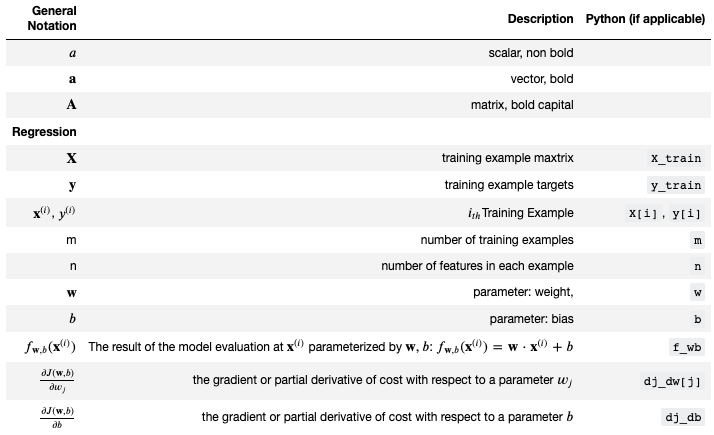

In [1]:
# Load the Libraries
import numpy as np
import matplotlib.pyplot as plt
import math

##  Data Set
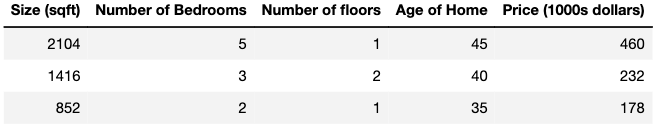

In [2]:
# X is a matric with dimensions (m, n) (m rows, n columns).
# Each row is a trainin example (m).
# Each column is a feature (n).
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])

y_train = np.array([460, 232, 178])

In [3]:
# Data Inspection

print(f"X: {X_train}")
print(f"X Shape: {X_train.shape}")
print("\n")

print(f"y: {y_train}")
print(f"y Shape: {y_train.shape}")
print("\n")

X: [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
X Shape: (3, 4)


y: [460 232 178]
y Shape: (3,)




##  Model
$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 

In [4]:
# Initial Parameters
# For demonstration, w and b will be loaded with some initial selected values that are near the optimal.

# w is a 1-D NumPy Array.
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init: {w_init}")
print(f"Shape of w_init: {w_init.shape}")
print("\n")

b_init = 785.1811367994083
print(f"b_init: {b_init}")

w_init: [  0.39133535  18.75376741 -53.36032453 -26.42131618]
Shape of w_init: (4,)


b_init: 785.1811367994083


In [5]:
def mul_lin_reg(X, w, b):
    # Number of Training Examples
    m = X.shape[0]
    
    # Number of Features
    n = X.shape[1]
    
    # Predictions (Equal to the Number of Training Examples)
    pred = np.zeros(m)
    
    # For Each Training Example
    for i in range(m):
        # Row/ Training Example
        x = X[i]
        
        # Prediction of the Corresponding Row/ Training Example
        p = 0
        
        # For Each Feature
        for j in range(n):
            p += w[j] * x[j]
        p += b
        pred[i] = p
    
    return pred

In [6]:
pred = mul_lin_reg(X_train, w_init, b_init)
print(f"Predictions: {pred}")
print(f"Shape of Predictions: {pred.shape}")

Predictions: [459.99999762 231.99999837 177.99999899]
Shape of Predictions: (3,)


In [7]:
# Single Prediction, Element by Element
# (1)

def predict_single_loop(x, w, b):
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    # Number of Features
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = w[i] * x[i]
        p += p_i
    p += b
    return p

In [8]:
# Get a Row from our Training Data
x_vec = X_train[0,:]
print(f"x_vec: {x_vec}")
print(f"Shape of x_vec: {x_vec.shape}")
print("\n")

# Make a Prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb: {f_wb}")
print(f"Shape of f_wb: {f_wb.shape}")

x_vec: [2104    5    1   45]
Shape of x_vec: (4,)


f_wb: 459.9999976194083
Shape of f_wb: ()


In [9]:
# Single Prediction, Vector
# (2)

def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(w, x) + b
    return p

In [10]:
# Get a Row from our Training Data
x_vec = X_train[0,:]
print(f"x_vec: {x_vec}")
print(f"Shape of x_vec: {x_vec.shape}")
print("\n")

# Make a Prediction
f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb: {f_wb}")
print(f"Shape of f_wb: {f_wb.shape}")

x_vec: [2104    5    1   45]
Shape of x_vec: (4,)


f_wb: 459.9999976194082
Shape of f_wb: ()


## Compute Cost with Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 

In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [11]:
# Compute Cost
# (3)

def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    # Number of Training Examples:
    m = X.shape[0]
    
    # Cost
    cost = 0
    
    for i in range(m):
        f_wb_i = np.dot(w, X[i]) + b
        cost += (f_wb_i - y[i])**2
    cost = cost/(2*m)
    return cost

In [12]:
# Notice the Change in Cost When We Change the Parameters
w_init = np.zeros(4)
b_init = 0

cost = compute_cost(X_train, y_train, w_init, b_init)
print(f"Cost: {cost}")

# Compute and Display Cost Using our Pre-Chosen Optimal Parameters
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
b_init = 785.1811367994083

cost = compute_cost(X_train, y_train, w_init, b_init)
print(f"Cost: {cost}")

Cost: 49518.0
Cost: 1.5578904330213735e-12


## Gradient Descent with Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [13]:
# Compute Gradient
# (6) & (7)

def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    # Number of Training Examples
    m = X.shape[0]
    
    # Number of Features (and w)
    n = X.shape[1]
    
    # Gradients
    dj_dw = np.zeros(n)
    dj_db = 0
    
    # For Each Training Example (m = 3)
    for i in range(m):
        error_i = (np.dot(w, X[i]) + b) - y[i]

        # For Each Feature (n = 4)
        for j in range(n):
            # i = 0
            # j = 0, dj_dw[0] += error_0 * X[0,0]
            # j = 1, dj_dw[1] += error_0 * X[0,1]
            # j = 2, dj_dw[2] += error_0 * X[0,2]
            # j = 3, dj_dw[3] += error_0 * X[0,3]
        
            # i = 1
            # j = 0, dj_dw[0] += error_1 * X[1,0]
            # j = 1, dj_dw[1] += error_1 * X[1,1]
            # j = 2, dj_dw[2] += error_1 * X[1,2]
            # j = 3, dj_dw[3] += error_1 * X[1,3]
        
            # i = 2
            # j = 0, dj_dw[0] += error_2 * X[2,0]
            # j = 1, dj_dw[1] += error_2 * X[2,1]
            # j = 2, dj_dw[2] += error_2 * X[2,2]
            # j = 3, dj_dw[3] += error_2 * X[2,3]
            
            # Update the Gradient of the Corresponding Weight w[j] 
            # by Adding the Product of the Error and the Current Feature Value
            dj_dw[j] += error_i * X[i, j]
        dj_db += error_i
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [14]:
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
b_init = 785.1811367994083

tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_dw at Initial w,b: {tmp_dj_dw}')
print(f'dj_db at Initial w,b: {tmp_dj_db}')

dj_dw at Initial w,b: [-2.72623577e-03 -6.27197263e-06 -2.21745571e-06 -6.92403379e-05]
dj_db at Initial w,b: -1.6739251122999121e-06


In [15]:
# Gradient Descent
# (5)

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
    """
    J_history = []
    w = w_in
    b = b_in
    
    # Until Convergence
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        
        # Update the Parameters
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        
        # Save Cost J at Each Iteration
        if i<100000: # Prevent Resource Exhaustion 
            J_history.append(cost_function(X, y, w, b))
        
        # Save and Print Cost at Each Hundredth Iteration
        if (i%100) == 0:
            print(f"Iteration {i:4d}, Cost: {J_history[i]:8.2f}")
            
    return w, b, J_history

In [16]:
# Initialize the Parameters
m, n = X_train.shape
w_initial = np.zeros(n)
b_initial = 0

# Set Up the Gradient Descent
iterations = 1000
alpha = 5.0e-7

# Run the Gradient Descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_initial, b_initial, 
                                            compute_cost, compute_gradient, alpha, iterations)

print(f"Parameter w Found by the Gradient Descent: {w_final}")
print(f"Parameter b Found by the Gradient Descent: {b_final}")

Iteration    0, Cost:  2529.46
Iteration  100, Cost:   695.99
Iteration  200, Cost:   694.92
Iteration  300, Cost:   693.86
Iteration  400, Cost:   692.81
Iteration  500, Cost:   691.77
Iteration  600, Cost:   690.73
Iteration  700, Cost:   689.71
Iteration  800, Cost:   688.70
Iteration  900, Cost:   687.69
Parameter w Found by the Gradient Descent: [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ]
Parameter b Found by the Gradient Descent: -0.0022354075309325345


## Results

*These results are not inspiring*! Cost is still declining and our predictions are not very accurate. The next lab will explore how to improve on this.

In [17]:
m, _ = X_train.shape
for i in range(m):
    print(f"Prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, Target Value: {y_train[i]}")

Prediction: 426.19, Target Value: 460
Prediction: 286.17, Target Value: 232
Prediction: 171.47, Target Value: 178


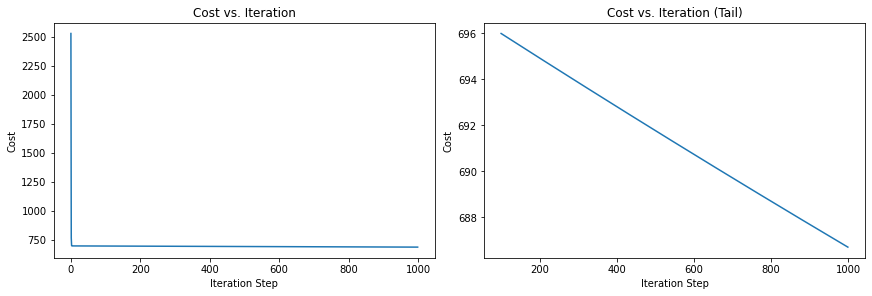

In [18]:
# Plot Cost versus Iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. Iteration");  ax2.set_title("Cost vs. Iteration (Tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('Iteration Step')   ;  ax2.set_xlabel('Iteration Step') 
plt.show()